In [0]:
%tensorflow_version 2.x
from keras.utils import to_categorical
import tensorflow as tf
import tensorflow_hub as hub
import random
import keras
from keras import optimizers


from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import os
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
N_train = np.zeros(shape=(100,128,128))
L_train = np.zeros(shape=(100,))
N_val = np.zeros(shape=(50,128,128))
L_val = np.zeros(shape=(50,))
N_test= np.zeros(shape=(100,128,128))
L_test =np.zeros(shape=(100,))

In [0]:
tno=os.listdir('drive/My Drive/data2/train/no_finding');
tfi=os.listdir('drive/My Drive/data2/train/infiltration');
vno=os.listdir('drive/My Drive/data2/validation/no_finding');
vfi=os.listdir('drive/My Drive/data2/validation/infiltration');
testno=os.listdir('drive/My Drive/data2/test/no_finding');
testfi=os.listdir('drive/My Drive/data2/test/infiltration');
print(len(vfi))
print(len(vno))
print(len(tfi))
print(len(tno))
print(len(testno))
print(len(testfi))

50
50
50
50
100
100


In [0]:
for x in range(100):  
  im = Image.open(os.path.join("drive/My Drive/data2/test/no_finding", testno[x]))
  im2arr = np.array(im)
  print(x)
  print(im2arr.shape)

0
(128, 128)
1
(128, 128)
2
(128, 128)
3
(128, 128)
4
(128, 128)
5
(128, 128)
6
(128, 128)
7
(128, 128)
8
(128, 128)
9
(128, 128)
10
(128, 128)
11
(128, 128)
12
(128, 128)
13
(128, 128)
14
(128, 128)
15
(128, 128)
16
(128, 128)
17
(128, 128)
18
(128, 128)
19
(128, 128)
20
(128, 128)
21
(128, 128)
22
(128, 128)
23
(128, 128)
24
(128, 128)
25
(128, 128)
26
(128, 128)
27
(128, 128)
28
(128, 128)
29
(128, 128)
30
(128, 128)
31
(128, 128)
32
(128, 128)
33
(128, 128)
34
(128, 128)
35
(128, 128)
36
(128, 128)
37
(128, 128)
38
(128, 128)
39
(128, 128)
40
(128, 128)
41
(128, 128)
42
(128, 128)
43
(128, 128)
44
(128, 128)
45
(128, 128)
46
(128, 128)
47
(128, 128)
48
(128, 128)
49
(128, 128)
50
(128, 128)
51
(128, 128)
52
(128, 128)
53
(128, 128)
54
(128, 128)
55
(128, 128)
56
(128, 128)
57
(128, 128)
58
(128, 128)
59
(128, 128)
60
(128, 128)
61
(128, 128)
62
(128, 128)
63
(128, 128)
64
(128, 128)
65
(128, 128)
66
(128, 128)
67
(128, 128)
68
(128, 128)
69
(128, 128)
70
(128, 128)
71
(128, 128)
72

In [0]:
for x in range(100):
  i=random.randint(0, 1)
  aux=random.randint(0,49)
  if(i):
    im = Image.open(os.path.join("drive/My Drive/data2/train/no_finding", tno[aux]))
    im2arr = np.array(im)
    N_train[x]=im2arr
    L_train[x]=0
  else:
    im = Image.open(os.path.join("drive/My Drive/data2/train/infiltration",tfi[aux]))
    im2arr = np.array(im)
    N_train[x]=im2arr
    L_train[x]=1


In [0]:
for x in range(49):
  i=random.randint(0, 1)
  aux=random.randint(0,49)
  if(i):
    im = Image.open(os.path.join("drive/My Drive/data2/validation/no_finding", vno[aux]))
    im2arr = np.array(im)
    N_val[x]=im2arr
    L_val[x]=0
  else:
    im = Image.open(os.path.join("drive/My Drive/data2/validation/infiltration",vfi[aux]))
    im2arr = np.array(im)
    N_val[x]=im2arr
    L_val[x]=1

In [0]:
for x in range(49):
  i=random.randint(0, 1)
  aux=random.randint(0,49)
  if(i):
    im = Image.open(os.path.join("drive/My Drive/data2/test/no_finding", testno[aux]))
    im2arr = np.array(im)
    N_test[x]=im2arr
    L_test[x]=0
  else:
    if(aux==22):
      aux=random.randint(0,21)
    im = Image.open(os.path.join("drive/My Drive/data2/test/infiltration",testfi[aux]))
    im2arr = np.array(im)
    N_test[x]=im2arr
    L_test[x]=1

In [0]:
total_train=len(N_train)
total_val=len(N_val)
total_test=len(N_test)

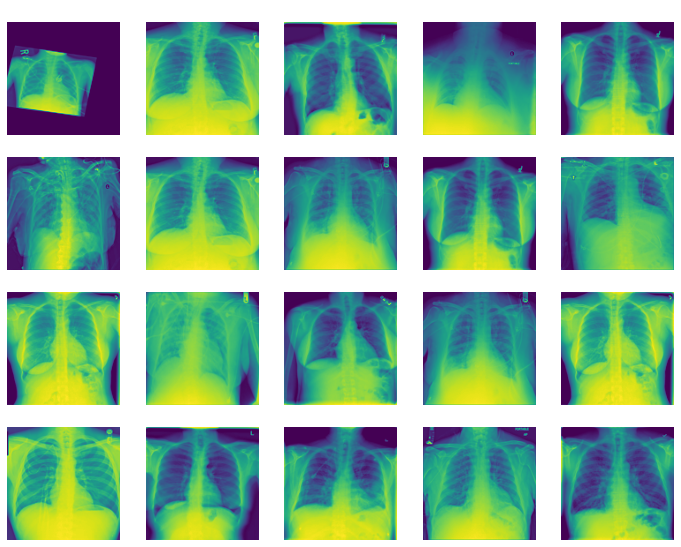

In [0]:
plt.figure(figsize=(12,12))
string=''
for x in range(20):
  if(L_train[x]==0):
    string="no finding"
  else:
    string="infiltration"
  plt.subplot(5,5,x+1) 
  plt.imshow(N_train[x])
  plt.title(string)
  plt.axis('off')

In [0]:
L_train = to_categorical(L_train)
L_val = to_categorical(L_val)
prueba=L_test
L_test = to_categorical(L_test)



In [0]:
L_val[0]

array([0., 1.], dtype=float32)

In [0]:
from keras.layers.normalization import BatchNormalization
model = Sequential([
    Conv2D(128, 27, padding='same', activation='relu', input_shape=(128,128,1)),
    MaxPooling2D(),
    Conv2D(64, 9, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [0]:
opt = adam(lr=0.1)

In [0]:
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam') 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 128)     93440     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        663616    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)       

In [0]:
# epochs = 15
# batch_size = 128
# IMAGE_SIZE = (128, 128)
N_train = N_train.reshape(100,128,128,1)
N_val = N_val.reshape(50,128,128,1)
N_test = N_test.reshape(100,128,128,1)

In [0]:
total_val


50

In [0]:
history=model.fit(N_train, L_train,batch_size=32,validation_data=(N_val, L_val), epochs=30)


Train on 100 samples, validate on 50 samples
Epoch 1/30
100/100 [==============================] - 68s 681ms/step - loss: 2.1473 - accuracy: 0.5350 - val_loss: 21.7696 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 67s 665ms/step - loss: 0.8266 - accuracy: 0.5350 - val_loss: 8.6807 - val_accuracy: 0.5300
Epoch 3/30
100/100 [==============================] - 66s 663ms/step - loss: 0.6059 - accuracy: 0.6700 - val_loss: 3.6114 - val_accuracy: 0.4800
Epoch 4/30
100/100 [==============================] - 66s 660ms/step - loss: 0.6870 - accuracy: 0.6150 - val_loss: 2.7384 - val_accuracy: 0.5600
Epoch 5/30
100/100 [==============================] - 66s 659ms/step - loss: 0.6183 - accuracy: 0.6700 - val_loss: 5.4122 - val_accuracy: 0.5100
Epoch 6/30
100/100 [==============================] - 66s 660ms/step - loss: 0.5985 - accuracy: 0.6500 - val_loss: 2.4591 - val_accuracy: 0.5800
Epoch 7/30
100/100 [==============================] - 66s 660ms/step - loss: 0.5692 

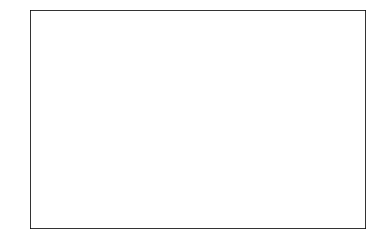

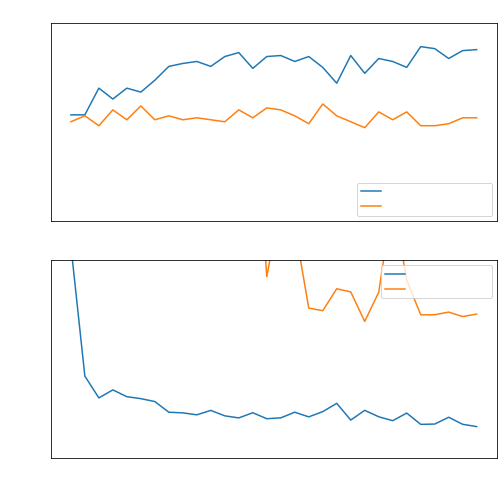

In [0]:
def plot_accuracy_and_loss(history, acc_ylim=[min(plt.ylim()),1.0], loss_ylim=[0,2.0]):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim(acc_ylim)
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim(loss_ylim)
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()
  
plot_accuracy_and_loss(history)

In [0]:
results=model.evaluate(N_test, L_test,batch_size=32)
print(results)

100/100 [==============================] - 16s 162ms/step
[0.5161496448521913, 0.8450000286102295]


In [0]:
predictions = model.predict(N_test)


In [0]:
predictions

array([[9.94830608e-01, 3.47427130e-02],
       [9.37426329e-01, 2.04338461e-01],
       [1.05137527e-02, 9.73918915e-01],
       [1.75084114e-01, 9.23815250e-01],
       [9.56322074e-01, 1.76637203e-01],
       [1.31921619e-01, 8.70797634e-01],
       [4.82102424e-01, 1.46623969e-01],
       [8.50555420e-01, 8.10362399e-02],
       [9.99563336e-01, 3.57679129e-02],
       [9.59536076e-01, 3.09262872e-02],
       [3.93929660e-01, 3.92038852e-01],
       [7.32685030e-02, 8.29167128e-01],
       [1.61707401e-03, 9.94387507e-01],
       [1.48622215e-01, 8.61545563e-01],
       [4.28228080e-02, 8.47162127e-01],
       [9.59983051e-01, 2.99690366e-02],
       [9.51271534e-01, 1.42058164e-01],
       [9.48504806e-01, 5.77208996e-02],
       [2.40237832e-01, 5.04841685e-01],
       [6.82306230e-01, 3.23366344e-01],
       [5.73696852e-01, 3.10202748e-01],
       [6.96408331e-01, 2.38352478e-01],
       [9.59983051e-01, 2.99690366e-02],
       [9.82827783e-01, 8.27638805e-02],
       [3.574644

In [0]:
for x in range (100):
  if(predictions[x][0]>predictions[x][1]):
    predictions[x][0]=1
    predictions[x][1]=0
  else:
    predictions[x][1]=1
    predictions[x][0]=0


In [0]:
print(L_test)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


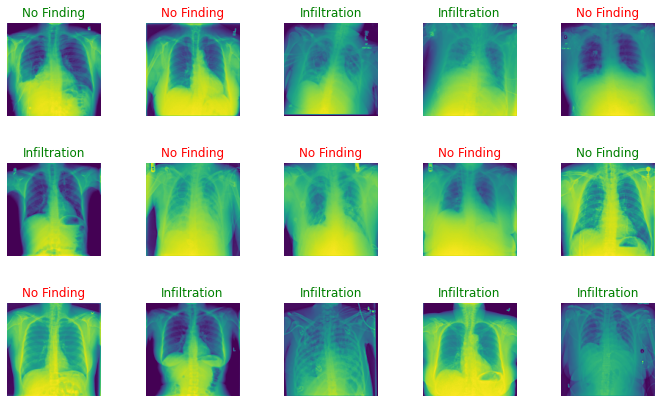

In [0]:
  N_test=N_test.reshape(100,128,128)
  piv=[]
  for i in range(len(L_test)):
    if(L_test[i][0]>L_test[i][1]):
      piv.append("No Finding")
    else:
      piv.append("Infiltration")
  submission = []
  for i in range(len(predictions)):
    if (predictions[i][0]>predictions[i][1]):
      #No Finding
      submission.append([N_test[i],"No Finding",piv[i]])
    else:
      #Infiltration
      submission.append([N_test[i],"Infiltration",piv[i]])
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for x in range(15):
    plt.subplot(5,5,x+1) 
    plt.imshow(submission[x][0])
    #plt.title(submission[x][1]+" / "+submission[x][2])
    color = "green" if (submission[x][1]==submission[x][2]) else "red"
    plt.title(submission[x][1],color=color)
    plt.axis('off')

In [0]:
#Calcular accuracy
  cont=0;
  for x in range(len(submission)):
    if (submission[x][1]==submission[x][2]):
      cont=cont+1
  print("Accuracy: "+str(cont/len(submission)))

Accuracy: 0.83


In [0]:
print(confusion_matrix(L_test.argmax(axis=1), predictions.argmax(axis=1) ))

[[71  5]
 [12 12]]


              precision    recall  f1-score   support

infiltration       0.86      0.93      0.89        76
  no_finding       0.71      0.50      0.59        24

    accuracy                           0.83       100
   macro avg       0.78      0.72      0.74       100
weighted avg       0.82      0.83      0.82       100



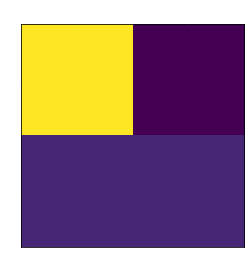

In [0]:

from sklearn.metrics import classification_report, confusion_matrix
plt.matshow(confusion_matrix(L_test.argmax(axis=1), predictions.argmax(axis=1) ))

print(classification_report(L_test.argmax(axis=1), predictions.argmax(axis=1), target_names = ['infiltration', 'no_finding']))